<a href="https://colab.research.google.com/github/joecinng/AllYourHealthyFood/blob/main/week5/task5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DECLARE THE MODULES and IMPORT LIBRARIES

In [ ]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

# First dataset: “NSL-KDD”

## Data import and preprocess


In [ ]:
!pip install wget
import wget

link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data)

In [ ]:
DataSet

'training_attack_types (1).txt'

In [ ]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names
# file, but it is supposed to be a binary feature according to the
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [ ]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [ ]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'

train_df = pd.read_csv(train_file, names=header_names)

print (train_df.info())

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)

test_df.info()

test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

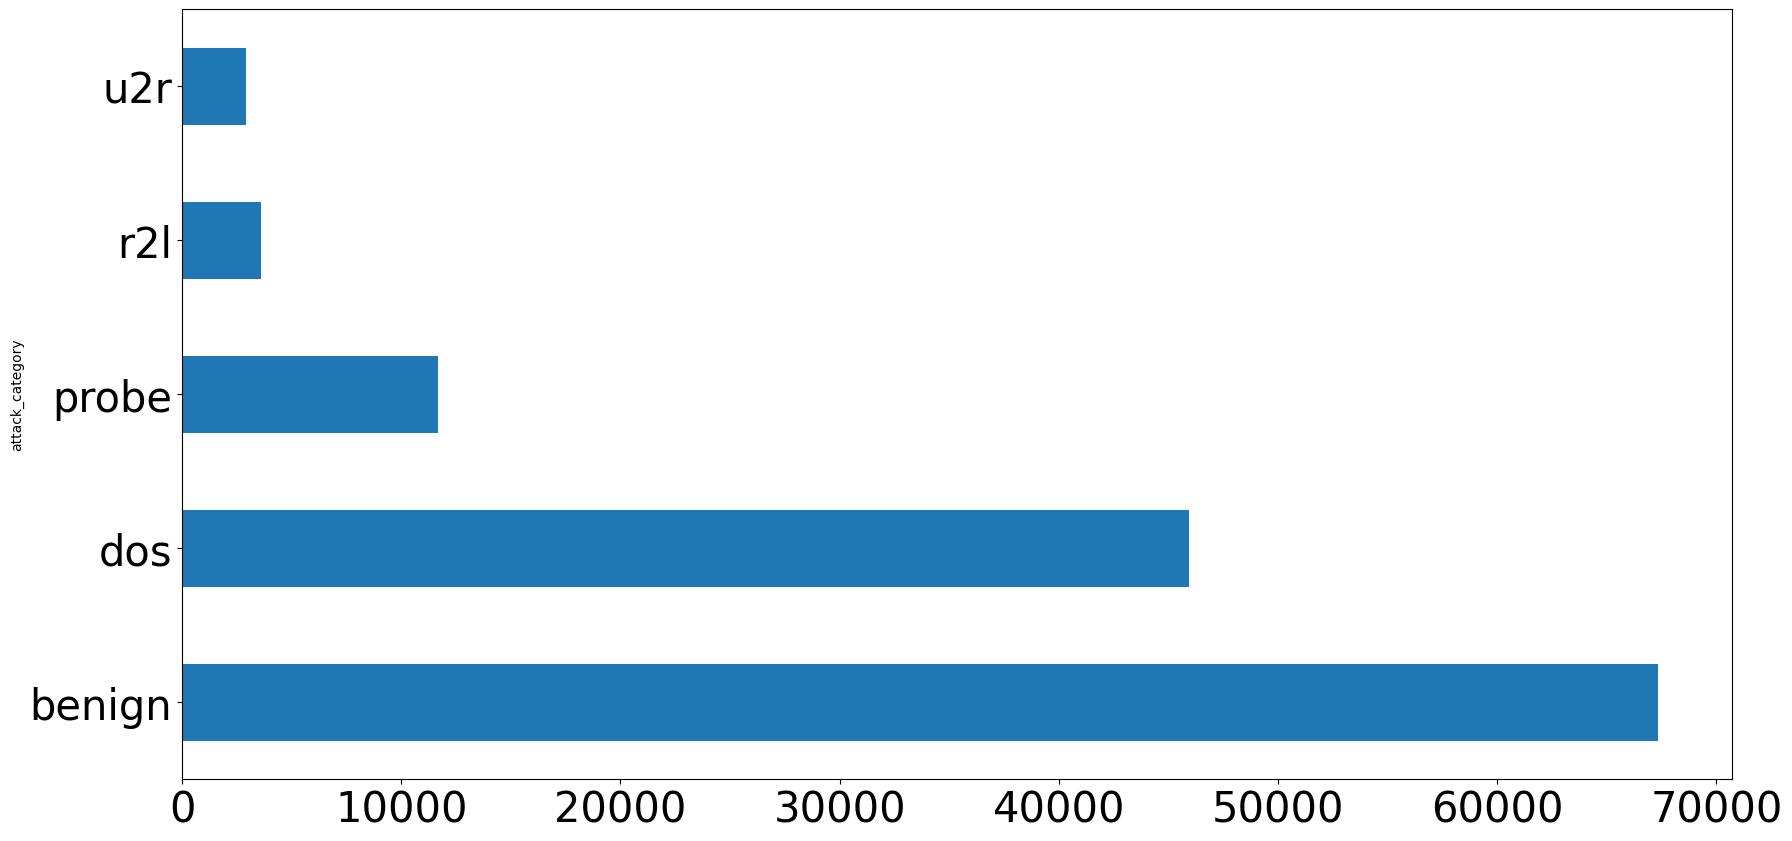

In [ ]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)

combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()


durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])

train_x.describe()

train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

## Multi class classification

This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [ ]:
def calculatePerformance(name, test_Y, pred_y):
  # Calculate the overall accuracy
  accuracy = accuracy_score(test_Y, pred_y) * 100

  # Generate the confusion matrix
  cm = confusion_matrix(test_Y, pred_y)

  # Initialize arrays to store precision, recall, f1, FPR, and FDR for each class
  precision_per_class = precision_score(test_Y, pred_y, average=None) * 100
  recall_per_class = recall_score(test_Y, pred_y, average=None) * 100
  f1_per_class = f1_score(test_Y, pred_y, average=None) * 100

  # False Alarm Rate (False Positive Rate)
  FP = cm.sum(axis=0) - np.diag(cm)
  TN = cm.sum() - (FP + cm.sum(axis=1) - np.diag(cm) + np.diag(cm))
  FPR_per_class = (FP / (FP + TN)) * 100

  # False Discovery Rate (FDR)
  FDR_per_class = (FP / (FP + np.diag(cm))) * 100

  # Print confusion matrix
  print("Confusion Matrix:")
  print(cm)

  # Print detailed classification report per class
  print("\nDetailed Classification Report per Class:")
  print("{:<15} {:<10} {:<10} {:<10} {:<10}".format('Class', 'Precision', 'Recall', 'F-Score', 'FPR'))
  class_names = ['Benign', 'Dos', 'Probe', 'R2L', 'U2R']

  for i, class_name in enumerate(class_names):
      print("{:<15} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(
          class_name,
          precision_per_class[i],
          recall_per_class[i],
          f1_per_class[i],
          FPR_per_class[i]
      ))

  # False Alarm Rate (False Positive Rate)
  FP = cm.sum(axis=0) - np.diag(cm)
  TN = cm.sum() - (FP + cm.sum(axis=1) - np.diag(cm) + np.diag(cm))
  FPR_per_class = (FP / (FP + TN)) * 100

  # False Discovery Rate (FDR)
  FDR_per_class = (FP / (FP + np.diag(cm))) * 100

  # Calculate average FPR
  average_FPR = np.mean(FPR_per_class)

  # Calculate the performance measures
  accuracy = accuracy_score(test_Y, pred_y) * 100
  precision = precision_score(test_Y, pred_y, average='weighted') * 100
  recall = recall_score(test_Y, pred_y, average='weighted') * 100
  f1 = f1_score(test_Y, pred_y, average='weighted') * 100

  accuracy_scores.append((name, accuracy))

  print("Accuracy: {:.2f}%".format(accuracy))
  print("Precision: {:.2f}%".format(precision))
  print("Recall: {:.2f}%".format(recall))
  print("F-Score: {:.2f}%".format(f1))
  print("Average FPR: {:.2f}%".format(average_FPR))

  # Plot the confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Dos', 'Probe', 'R2L', 'U2R'])
  disp.plot(cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.show()

### Decision Tree Classifier

Confusion Matrix:
[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]

Detailed Classification Report per Class:
Class           Precision  Recall     F-Score    FPR       
Benign          66.72      96.44      78.87      36.40     
Dos             95.59      78.55      86.23      1.86      
Probe           79.03      62.98      70.10      2.01      
R2L             97.88      10.76      19.39      0.03      
U2R             78.95      7.50       13.70      0.02      
Accuracy: 76.21%
Precision: 81.49%
Recall: 76.21%
F-Score: 73.05%
Average FPR: 8.06%


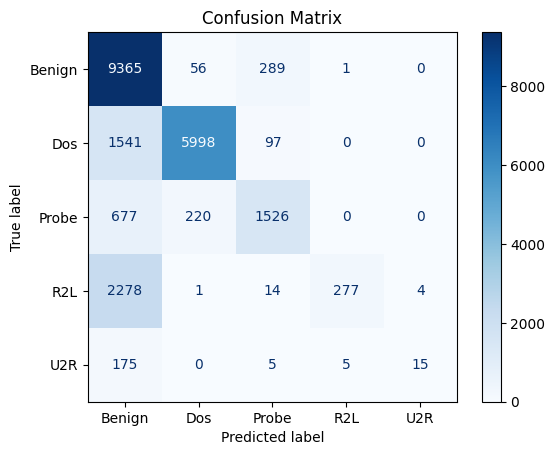

In [ ]:
accuracy_scores = []

# Example to train and use the classifier
classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)
pred_y = classifier.predict(test_x)

# Call the performance calculation function
calculatePerformance("Decision Tree", test_Y, pred_y)

### Logistic Regression

Confusion Matrix:
[[8993   90  624    2    2]
 [1560 6052   24    0    0]
 [ 496   99 1825    3    0]
 [2471    2    2   99    0]
 [ 184    3    0    5    8]]

Detailed Classification Report per Class:
Class           Precision  Recall     F-Score    FPR       
Benign          65.62      92.61      76.81      36.71     
Dos             96.89      79.26      87.19      1.30      
Probe           73.74      75.32      74.52      3.23      
R2L             90.83      3.85       7.38       0.05      
U2R             80.00      4.00       7.62       0.01      
Accuracy: 75.31%
Precision: 80.09%
Recall: 75.31%
F-Score: 71.54%
Average FPR: 8.26%


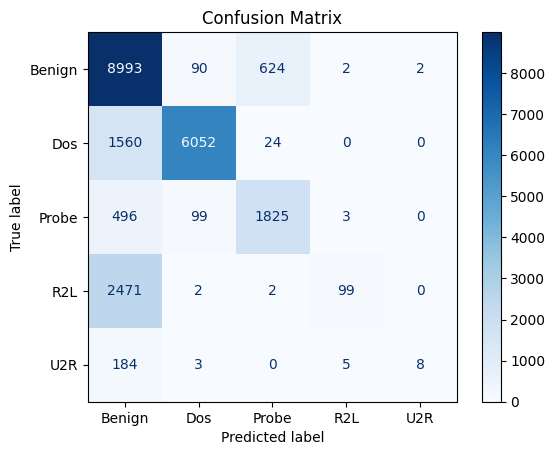

In [ ]:
clf = LogisticRegression()
clf.fit(train_x, train_Y)

pred_y = clf.predict(test_x)

# Call the performance calculation function
calculatePerformance("Logistic Regression", test_Y, pred_y)

### Naive Bayes

Confusion Matrix:
[[6756   62   10 2599  284]
 [3400 3162    4 1041   29]
 [1382  345  237  323  136]
 [1113    3    6  933  519]
 [ 115    0    0   22   63]]

Detailed Classification Report per Class:
Class           Precision  Recall     F-Score    FPR       
Benign          52.92      69.57      60.11      46.83     
Dos             88.52      41.41      56.42      2.75      
Probe           92.22      9.78       17.69      0.10      
R2L             18.97      36.25      24.91      19.95     
U2R             6.11       31.50      10.24      4.33      
Accuracy: 49.46%
Precision: 64.91%
Recall: 49.46%
F-Score: 49.84%
Average FPR: 14.79%


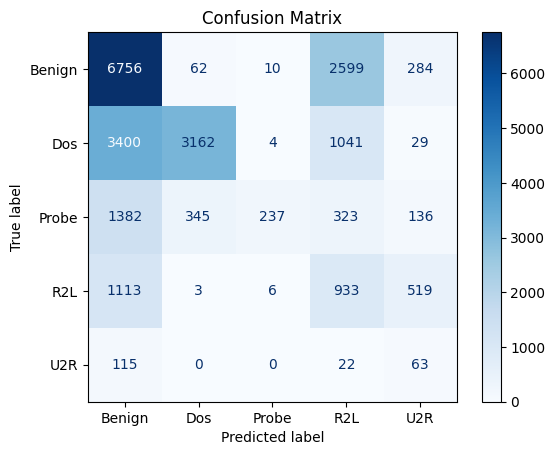

In [ ]:
gnb = GaussianNB()
pred_y = gnb.fit(train_x, train_Y).predict(test_x)

# Call the performance calculation function
calculatePerformance("Naive Bayes", test_Y, pred_y)

### Random Forest

Confusion Matrix:
[[9445   67  197    1    1]
 [1561 5988   87    0    0]
 [ 785  164 1474    0    0]
 [2519    0    0   54    1]
 [ 194    0    0    3    3]]

Detailed Classification Report per Class:
Class           Precision  Recall     F-Score    FPR       
Benign          65.12      97.26      78.01      39.42     
Dos             96.29      78.42      86.44      1.55      
Probe           83.85      60.83      70.51      1.41      
R2L             93.10      2.10       4.10       0.02      
U2R             60.00      1.50       2.93       0.01      
Accuracy: 75.25%
Precision: 80.84%
Recall: 75.25%
F-Score: 70.95%
Average FPR: 8.48%


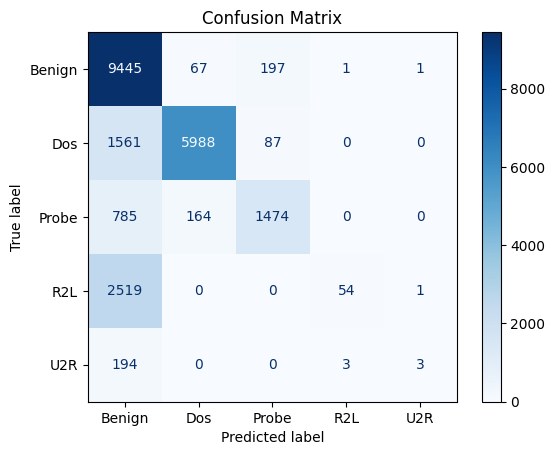

In [ ]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)  # Change variable name for clarity
classifier.fit(train_x, train_Y)
pred_y = classifier.predict(test_x)

# Call the performance calculation function
calculatePerformance("Random Forest", test_Y, pred_y)

### MLP Classifier

Confusion Matrix:
[[9040  402  230   39    0]
 [1803 5664  168    1    0]
 [ 528  165 1730    0    0]
 [1933  295    2  344    0]
 [ 178    9    2   11    0]]

Detailed Classification Report per Class:
Class           Precision  Recall     F-Score    FPR       
Benign          67.05      93.09      77.95      34.61     
Dos             86.67      74.17      79.94      5.84      
Probe           81.14      71.40      75.96      2.00      
R2L             87.09      13.36      23.17      0.26      
U2R             0.00       0.00       0.00       0.00      
Accuracy: 74.42%
Precision: 76.91%
Recall: 74.42%
F-Score: 71.47%
Average FPR: 8.54%


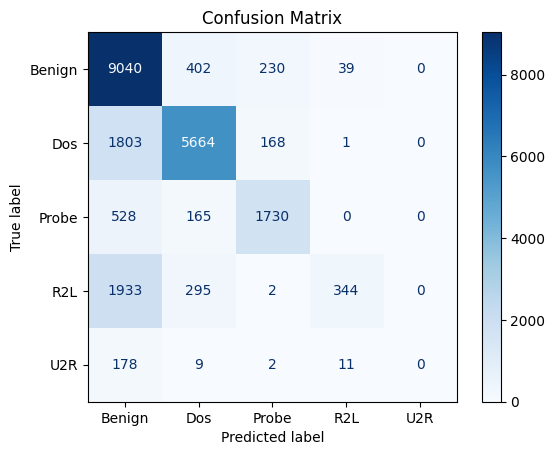

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train_x, train_Y)

pred_y = clf.predict(test_x)

# Call the performance calculation function
calculatePerformance("MLP Classifier", test_Y, pred_y)

### Comparison of accuracy across different algorithms

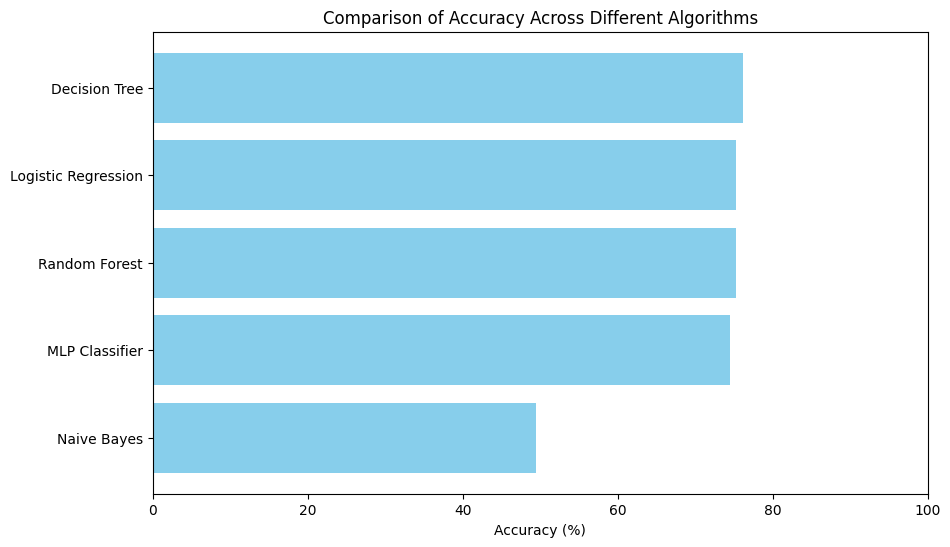

In [ ]:
# Sort the classifiers by accuracy
accuracy_scores.sort(key=lambda x: x[1], reverse=True)

# Extract names and scores for plotting
names, scores = zip(*accuracy_scores)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.barh(names, scores, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Comparison of Accuracy Across Different Algorithms')
plt.xlim(0, 100)
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.show()

# Second dataset: “Processed Combined IoT dataset”

## Data import and preprocess

In [ ]:
# Load the data into a DataFrame
df = pd.read_csv('Processed_Combined_IoT_dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

   FC1_Read_Input_Register  FC2_Read_Discrete_Value  \
0                 0.495216                 0.499092   
1                 0.495216                 0.499092   
2                 0.495216                 0.499092   
3                 0.495216                 0.499092   
4                 0.495216                 0.499092   

   FC3_Read_Holding_Register  FC4_Read_Coil  current_temperature  door_state  \
0                   0.488897       0.499405             0.344399           0   
1                   0.488897       0.499405             0.344399           0   
2                   0.488897       0.499405             0.344399           0   
3                   0.488897       0.499405             0.344399           0   
4                   0.488897       0.499405             0.344399           0   

   fridge_temperature  humidity  latitude  light_status  longitude  \
0            0.930769  0.462511  0.008217             0   0.008112   
1            0.588462  0.462511  0.008217       

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401119 entries, 0 to 401118
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   FC1_Read_Input_Register    401119 non-null  float64
 1   FC2_Read_Discrete_Value    401119 non-null  float64
 2   FC3_Read_Holding_Register  401119 non-null  float64
 3   FC4_Read_Coil              401119 non-null  float64
 4   current_temperature        401119 non-null  float64
 5   door_state                 401119 non-null  int64  
 6   fridge_temperature         401119 non-null  float64
 7   humidity                   401119 non-null  float64
 8   latitude                   401119 non-null  float64
 9   light_status               401119 non-null  int64  
 10  longitude                  401119 non-null  float64
 11  motion_status              401119 non-null  int64  
 12  pressure                   401119 non-null  float64
 13  sphone_signal              40

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 FC1_Read_Input_Register      0
FC2_Read_Discrete_Value      0
FC3_Read_Holding_Register    0
FC4_Read_Coil                0
current_temperature          0
door_state                   0
fridge_temperature           0
humidity                     0
latitude                     0
light_status                 0
longitude                    0
motion_status                0
pressure                     0
sphone_signal                0
temp_condition               0
temperature                  0
thermostat_status            0
label                        0
dtype: int64


In [ ]:
# Separate features and target labels
X = df.drop('label', axis=1)  # Features
y = df['label']               # Target

# Split the data into training and testing sets
train_x, test_x, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=17)
accuracy_scores_2 = []

## Multi class classification

In [ ]:
def calculateSecondPerformance(name, test_Y, pred_y):
    # Calculate performance metrics
    accuracy = accuracy_score(test_Y, pred_y) * 100
    precision = precision_score(test_Y, pred_y, average='weighted') * 100
    recall = recall_score(test_Y, pred_y, average='weighted') * 100
    f1 = f1_score(test_Y, pred_y, average='weighted') * 100

    # Print the results
    print("Results:")
    print("Accuracy: {:.2f}%".format(accuracy))
    print("Precision: {:.2f}%".format(precision))
    print("Recall: {:.2f}%".format(recall))
    print("F1-Score: {:.2f}%".format(f1))

    # Generate the confusion matrix
    cm = confusion_matrix(test_Y, pred_y)
    print(cm)

    # Initialize arrays to store precision, recall, f1, FPR, and FDR for each class
    precision_per_class = precision_score(test_Y, pred_y, average=None) * 100
    recall_per_class = recall_score(test_Y, pred_y, average=None) * 100
    f1_per_class = f1_score(test_Y, pred_y, average=None) * 100

    # False Alarm Rate (False Positive Rate)
    FP = cm.sum(axis=0) - np.diag(cm)
    TN = cm.sum() - (FP + cm.sum(axis=1) - np.diag(cm) + np.diag(cm))
    FPR_per_class = (FP / (FP + TN)) * 100

    # False Discovery Rate (FDR)
    FDR_per_class = (FP / (FP + np.diag(cm))) * 100

    # Print detailed classification report per class
    print("\nDetailed Classification Report per Class:")
    print("{:<15} {:<10} {:<10} {:<10} {:<10}".format('Class', 'Precision', 'Recall', 'F-Score', 'FPR'))
    class_names = ['0', '1']

    for i, class_name in enumerate(class_names):
        print("{:<15} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(
            class_name,
            precision_per_class[i],
            recall_per_class[i],
            f1_per_class[i],
            FPR_per_class[i]
        ))

    accuracy_scores_2.append((name, accuracy))

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
# calculateSecondPerformance(test_Y, pred_y)

### Decision Tree Classifier

Results:
Accuracy: 86.53%
Precision: 86.77%
Recall: 86.53%
F1-Score: 86.25%
[[69484  4245]
 [11967 34640]]

Detailed Classification Report per Class:
Class           Precision  Recall     F-Score    FPR       
0               85.31      94.24      89.55      25.68     
1               89.08      74.32      81.04      5.76      


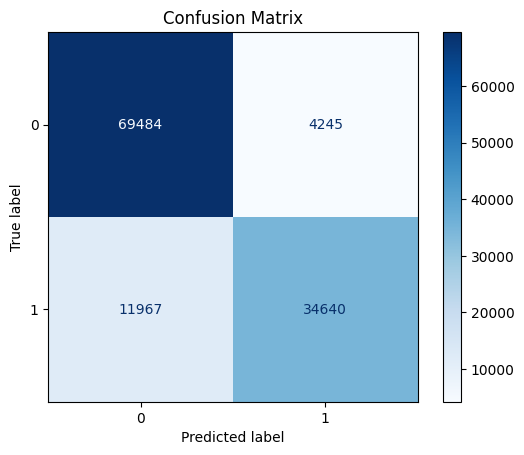

In [ ]:
# Initialize lists to store accuracy scores
accuracy_scores = []

# Train the classifier
classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)
pred_y = classifier.predict(test_x)

calculateSecondPerformance("Decision Tree", test_Y, pred_y)

### Random Forest

Results:
Accuracy: 87.04%
Precision: 87.42%
Recall: 87.04%
F1-Score: 86.75%
[[70193  3536]
 [12054 34553]]

Detailed Classification Report per Class:
Class           Precision  Recall     F-Score    FPR       
0               85.34      95.20      90.00      25.86     
1               90.72      74.14      81.59      4.80      


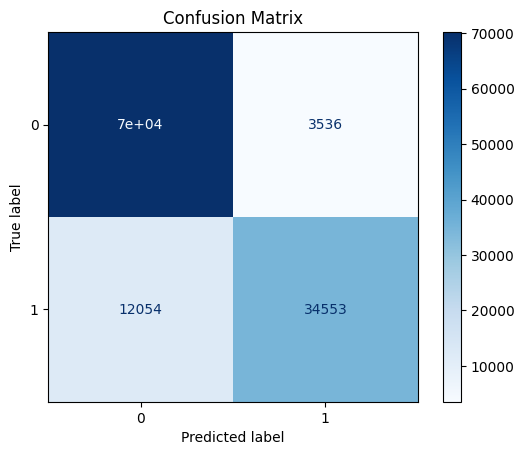

In [ ]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)  # Change variable name for clarity
classifier.fit(train_x, train_Y)
pred_y = classifier.predict(test_x)

calculateSecondPerformance("Random Forest", test_Y, pred_y)

### KNN Classifier

Results:
Accuracy: 84.82%
Precision: 86.13%
Recall: 84.82%
F1-Score: 84.15%
[[71490  2239]
 [16031 30576]]

Detailed Classification Report per Class:
Class           Precision  Recall     F-Score    FPR       
0               81.68      96.96      88.67      34.40     
1               93.18      65.60      77.00      3.04      


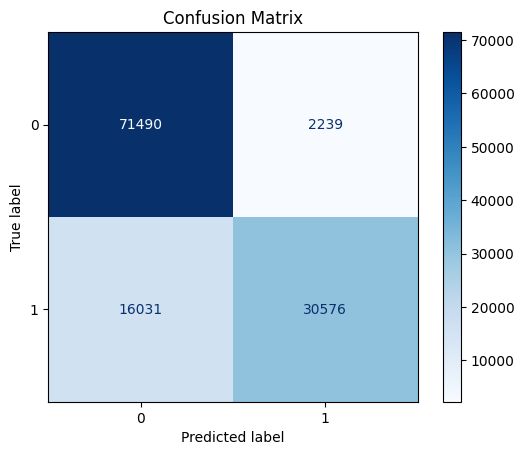

In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)  # You can adjust the number of neighbors

# Train the classifier
knn.fit(train_x, train_Y)

# Make predictions on the test set
pred_y = knn.predict(test_x)

calculateSecondPerformance("kNN", test_Y, pred_y)

### DNN

Epoch 1/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7527 - loss: 0.5011
Epoch 2/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7949 - loss: 0.4253
Epoch 3/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7982 - loss: 0.4154
Epoch 4/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7985 - loss: 0.4101
Epoch 5/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7989 - loss: 0.4086
Epoch 6/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8014 - loss: 0.4039
Epoch 7/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8044 - loss: 0.4005
Epoch 8/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8037 - loss: 0.4016
Epoch 9/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8037 - loss: 0.4001
Epoch 10/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8052 - loss: 0.3969
DNN Accuracy: 80.75%
3761/3761 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Results:
Accuracy: 80.75%
Precision: 82.74%
R

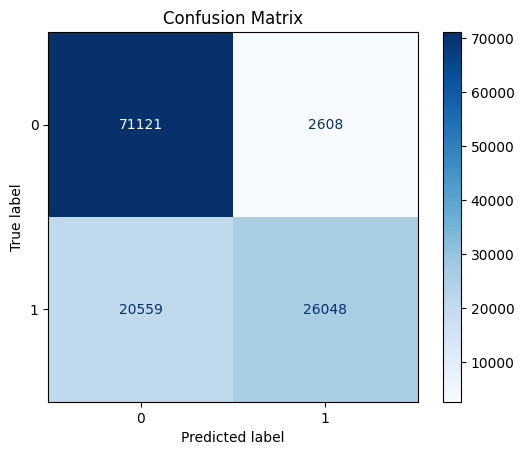

In [ ]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(train_x.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(np.unique(train_Y)), activation='softmax')  # Output layer with softmax for multiclass
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_x, train_Y, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model to get accuracy
loss, accuracy = model.evaluate(test_x, test_Y, verbose=0)
print("DNN Accuracy: {:.2f}%".format(accuracy * 100))

# Make predictions on the test set
pred_y = model.predict(test_x)

# Convert predicted probabilities to class labels
pred_y_classes = np.argmax(pred_y, axis=1)

calculateSecondPerformance("DNN", test_Y, pred_y_classes)

### Adaboost Classifier

Results:
Accuracy: 80.10%
Precision: 82.07%
Recall: 80.10%
F1-Score: 78.77%
[[70905  2824]
 [21125 25482]]

Detailed Classification Report per Class:
Class           Precision  Recall     F-Score    FPR       
0               77.05      96.17      85.55      45.33     
1               90.02      54.67      68.03      3.83      


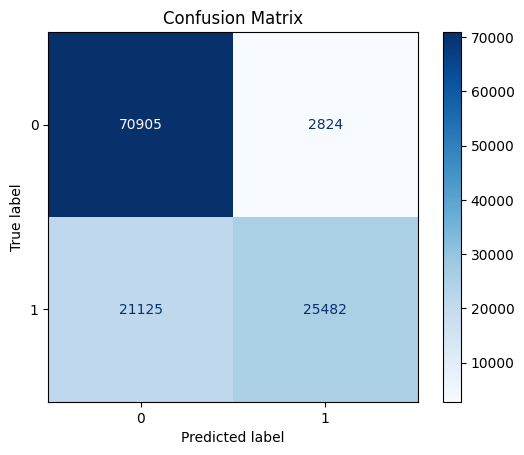

In [ ]:
# Initialize the AdaBoost classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=17)  # Adjust n_estimators as needed

# Train the classifier
ada.fit(train_x, train_Y)

# Make predictions on the test set
pred_y = ada.predict(test_x)

calculateSecondPerformance("Adaboost", test_Y, pred_y)

### Comparison of accuracy across different algorithms

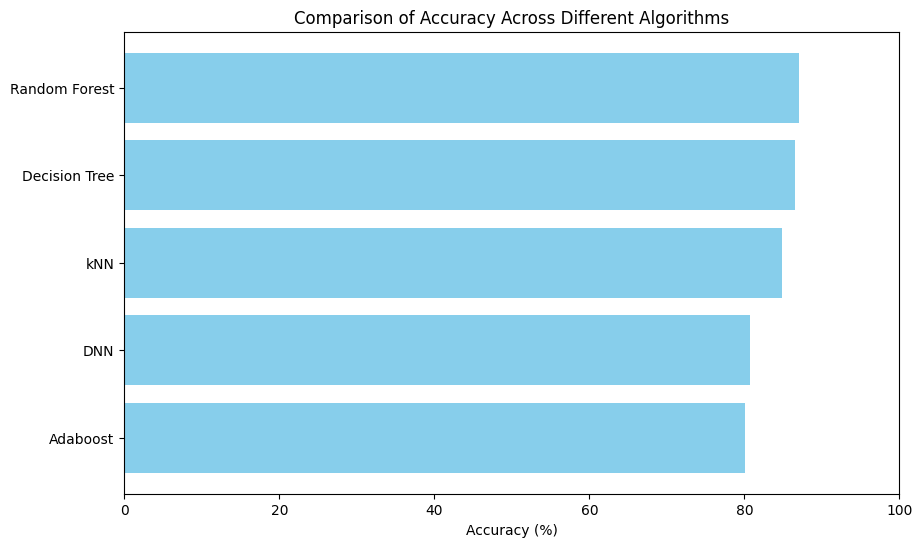

In [ ]:
# Sort the classifiers by accuracy
accuracy_scores_2.sort(key=lambda x: x[1], reverse=True)

# Extract names and scores for plotting
names, scores = zip(*accuracy_scores_2)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.barh(names, scores, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Comparison of Accuracy Across Different Algorithms')
plt.xlim(0, 100)
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.show()